## Observations and Insights 

In [1]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Reading the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combining the data into a single dataset
combined_data = pd.merge(mouse_metadata,study_results, how='left', on='Mouse ID')

# Displaying the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_count = pd.DataFrame({'Total Number of Mouse': [combined_data['Mouse ID'].nunique()]})
mouse_count

,Total Number of Mouse
0,249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mouse = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False), "Mouse ID"].unique() 
print(f"List of Mouse IDs Duplicated: {duplicated_mouse}")

List of Mouse IDs Duplicated: ['g989']


In [4]:
# Getting all the data for the duplicate mouse ID. 
duplicate_data = combined_data.loc[combined_data['Mouse ID'].isin(duplicated_mouse)==True]
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Creating a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.loc[combined_data['Mouse ID'].isin(duplicated_mouse)==False]

# Checking for any data of the duplicated mouse in the clean DataFrame
duplicate_count = len(clean_data.loc[clean_data['Mouse ID'].isin(duplicated_mouse)==True])
print(f"The number of rows for duplicate mouse in Clean Data = {duplicate_count}")

The number of rows for duplicate mouse in Clean Data = 0


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_count2 = pd.DataFrame({'Total Number of Mouse': [clean_data['Mouse ID'].nunique()]})
mouse_count2

,Total Number of Mouse
0,248


## Summary Statistics

In [7]:
# Generating a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Creating a groupby object on Drug Regimen with Tumor Volume (mm3)
treatment_group = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)']

# Applying the statistics and assigning into variables
volume_mean = treatment_group.mean()
volume_median = treatment_group.median()
volume_var = treatment_group.var()
volume_std = treatment_group.std()
volume_sem = treatment_group.sem()


# Creating multiple series and putting them all together at the end.
volume_summary = pd.DataFrame({"Mean": volume_mean,
                               "Median": volume_median,
                               "Variance": volume_var,
                               "Standard Deviation": volume_std,
                               "SEM": volume_sem
                              })
# Formating the data
volume_summary = volume_summary.applymap("{0:.2f}".format)

print("\n\tSummary Statistics of the tumor volume for each regimen")
volume_summary


	Summary Statistics of the tumor volume for each regimen


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [8]:
# Generating a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
volume_df = clean_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':[('Mean', 'mean'), 
                                                                          ('Median', 'median'), 
                                                                          ('Variance', 'var'), 
                                                                          ('Standard Deviation', 'std'), 
                                                                          ('SEM', 'sem')]})
# Formating the data
volume_df = volume_df.applymap("{0:.2f}".format)

volume_df

Tumor Volume (mm3)                                         
                           Mean Median Variance Standard Deviation   SEM
Drug Regimen                                                            
Capomulin                 40.68  41.56    24.95               4.99  0.33
Ceftamin                  52.59  51.78    39.29               6.27  0.47
Infubinol                 52.88  51.82    43.13               6.57  0.49
Ketapril                  55.24  53.70    68.55               8.28  0.60
Naftisol                  54.33  52.51    66.17               8.13  0.60
Placebo                   54.03  52.29    61.17               7.82  0.58
Propriva                  52.32  50.45    43.85               6.62  0.54
Ramicane                  40.22  40.67    23.49               4.85  0.32
Stelasyn                  54.23  52.43    59.45               7.71  0.57
Zoniferol                 53.24  51.82    48.53               6.97  0.52

## Bar and Pie Charts

In [9]:
# Customizing the default style in Matplotlib rc file
plt.rcParams.update({'font.size': 12})

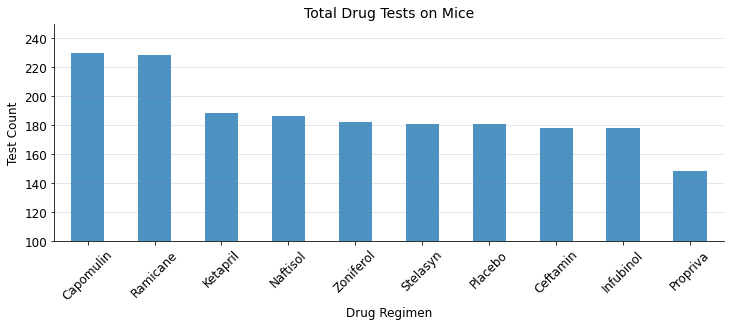

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# Creating a Data Frame for total number of mice for each treatment
drug_test_count = pd.DataFrame(clean_data['Drug Regimen'].value_counts()).reset_index()
# Renaming the columns of the Data Frame
drug_test_count = drug_test_count.rename(columns={'index': 'Drug Regimen', 'Drug Regimen': 'Mouse Count'})

# Creating a bar plot from the Data Frame
ax = drug_test_count.plot(kind="bar",
                          figsize=(12,4),
                          alpha=0.8,
                          legend=False,
                          ylim=(100, max(drug_test_count['Mouse Count'])+20)
                         )

# Adding title and labels to the plot 
ax.set_title("Total Drug Tests on Mice", fontsize=14)
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Test Count")
ax.set_xticklabels(drug_test_count['Drug Regimen'], rotation=45)

# Adding grid lines across y axis to the chart
ax.yaxis.grid(color="grey", alpha=0.25)

# Removing the top and right spines
ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False)

# Print our chart to the screen
plt.show()

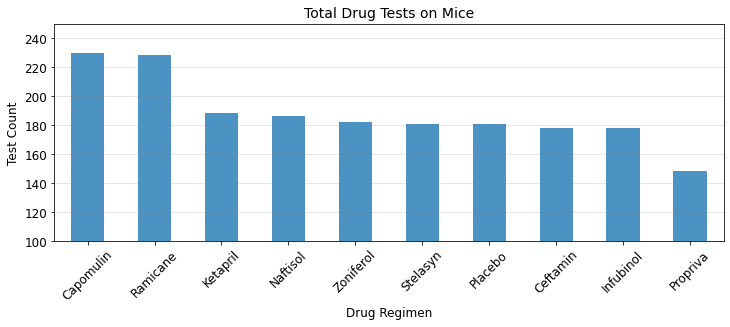

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# Creating a list(Series) from the drug_test_count Data Frame for y values
test_count = drug_test_count['Mouse Count']

# Creating an array to mark the x axis header locations 
x_axis = np.arange(len(drug_test_count))

# Setting the figure size
plt.figure(figsize=(12,4))

# Creating a bar plot with the lists of x and y values
plt.bar(x_axis, test_count, alpha=0.8, width=.5)

# Create the ticks(headers) for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_test_count['Drug Regimen'], rotation=45)

# Adding title, labels and axis limits to the plot 
plt.title("Total Drug Tests on Mice", fontsize=14)
plt.xlabel("Drug Regimen")
plt.ylabel("Test Count")
plt.xlim(-0.5, len(x_axis)-0.5)
plt.ylim(100, max(drug_test_count['Mouse Count'])+20)

# Adding grid lines across y axis to the chart
plt.grid(axis='y', color="grey", alpha=0.25)

# Removing the top and right spines
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

# Print our chart to the screen
plt.show()

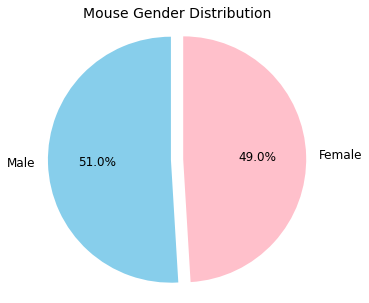

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Creating a Data Frame for the distribution of each Gender of mice
gender_data = pd.DataFrame(clean_data['Sex'].value_counts()).reset_index()

# Renaming the Data Frame Column names
gender_data = gender_data.rename(columns={'index': 'Sex', 'Sex': 'Mouse Count'})

# Set the index of this new dataframe to be the Sex
gender_data = gender_data.set_index('Sex')

# Creating a pie plot from the Data Frame
ax = gender_data.plot(kind='pie',
                      y='Mouse Count',
                      autopct='%1.1f%%',
                      explode=[0.1,0],
                      figsize=(5, 5),
                      colors=["skyblue", "pink"],
                      startangle=90,
                      legend=False)

# Adding title and ylabel to the plot 
ax.set_title("Mouse Gender Distribution", fontsize=14)
ax.set_ylabel(" ")

# Maintaining the circle shape
plt.axis("equal")
# Print our chart to the screen
plt.show()

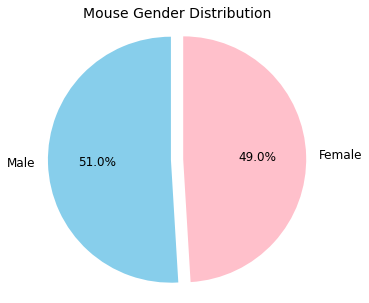

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for the sections of our pie chart
labels = gender_data.index

# Creating a list(Series) for values of each section of the pie chart
gender_count = gender_data['Mouse Count']

# Setting the figure size
plt.figure(figsize=(5, 5))

# Creating a pie plot based upon the gender_count list 
plt.pie(gender_count,
        labels=labels,
        autopct="%1.1f%%",
        explode=[0.1,0],
        colors=["skyblue", "pink"],
        startangle=90)

# Adding title
plt.title("Mouse Gender Distribution", fontsize=14)

# Maintaining the circle shape
plt.axis("equal")
# Print our chart to the screen
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Getting the last (greatest) timepoint for each mouse into a data frame
volume_data = clean_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original data frame to get the tumor volume at the last timepoint
volume_data = pd.merge(volume_data, clean_data, how='left', on=['Mouse ID','Timepoint'])
volume_data.head(10)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
5,a401,45,Zoniferol,Female,8,25,66.794156,4
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
8,a457,10,Ketapril,Female,11,30,49.783419,0
9,a492,45,Stelasyn,Male,20,25,60.122011,1


In [15]:
# Putting treatments into a list for for loop (and later for plot labels)
drug_regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Creating empty list to fill with tumor vol data (for plotting)
treatment_lists = [ [] for _ in range(len(drug_regimen)) ]

#  for loop to add each final tumor volumes into corresponding treatment list
for index,row in volume_data.iterrows():
    if (row['Drug Regimen'] in drug_regimen):
        for i in range(len(drug_regimen)):
            # Locating the rows which contain mice on each drug and get the tumor volumes
            if (row['Drug Regimen'] == drug_regimen[i]):
                treatment_lists[i].append(row['Tumor Volume (mm3)'])
                break


In [16]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Defining a function to Calculate and Display Quartiles and Outlier Bounds
def print_quartiles_outliers(treatment_list, drug_regimen):
    #Calculating Quartiles
    treatment = pd.Series(treatment_list)
    quartiles = treatment.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f"\n------------ {drug_regimen} ------------")
    # Displaying Quartiles
    print(f"The lower quartile for final Tumor Volume is: {lowerq}")
    print(f"The upper quartile for final Tumor Volume is: {upperq}")
    print(f"The interquartile range is: {iqr}")
    print(f"The the median for final Tumor Volume is: {quartiles[0.5]}\n")

    # Calculating upper and lower bounds for Outlier detection
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    # Displaying Outlier bounds 
    print(f"Tumor Volume below {lower_bound} could be outliers.")
    print(f"Tumor Volume {upper_bound} could be outliers.")
      
    # Finding any Outliers using list comprehension
    outliers = [i for i in treatment_list if ((i > upper_bound) | (i < lower_bound))]
    print(f"\n\tNumber of Outliers: {len(outliers)}\n")


In [17]:
# Calling quartiles and outliers function for each Treatment
for i in range(len(drug_regimen)):
    print_quartiles_outliers(treatment_lists[i], drug_regimen[i])



------------ Capomulin ------------
The lower quartile for final Tumor Volume is: 32.37735684
The upper quartile for final Tumor Volume is: 40.1592203
The interquartile range is: 7.781863460000004
The the median for final Tumor Volume is: 38.125164399999996

Tumor Volume below 20.70456164999999 could be outliers.
Tumor Volume 51.83201549 could be outliers.

	Number of Outliers: 0


------------ Ramicane ------------
The lower quartile for final Tumor Volume is: 31.56046955
The upper quartile for final Tumor Volume is: 40.65900627
The interquartile range is: 9.098536719999998
The the median for final Tumor Volume is: 36.56165229

Tumor Volume below 17.912664470000003 could be outliers.
Tumor Volume 54.30681135 could be outliers.

	Number of Outliers: 0


------------ Infubinol ------------
The lower quartile for final Tumor Volume is: 54.04860769
The upper quartile for final Tumor Volume is: 65.52574285
The interquartile range is: 11.477135160000003
The the median for final Tumor Volum

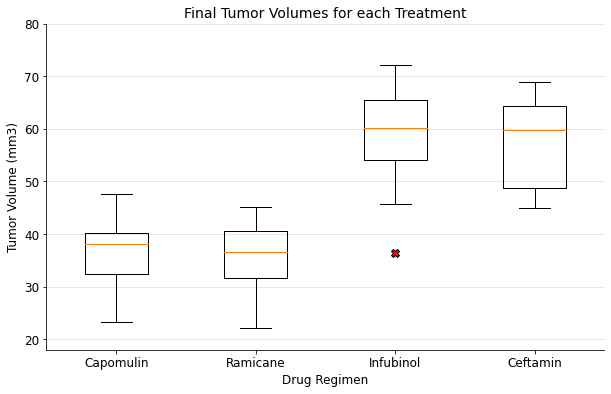

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Setting the figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Adding title, labels and ylim to the plot 
ax.set_title('Final Tumor Volumes for each Treatment', fontsize=14)
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_xlabel('Drug Regimen')
ax.set_ylim(18,80)

# Defining styles for the fliers(Outlier markings)
flierprops = dict(marker='X', markerfacecolor='r', markersize=8)

# Creating a box plot based upon the treatment_lists (a list of lists) and a list of drug regimen
ax.boxplot(treatment_lists,
           labels=drug_regimen, 
           flierprops=flierprops
          )

# Adding grid lines across y axis to the chart
ax.yaxis.grid(color="grey", alpha=0.25)

# Print our chart to the screen
plt.show()

## Line and Scatter Plots

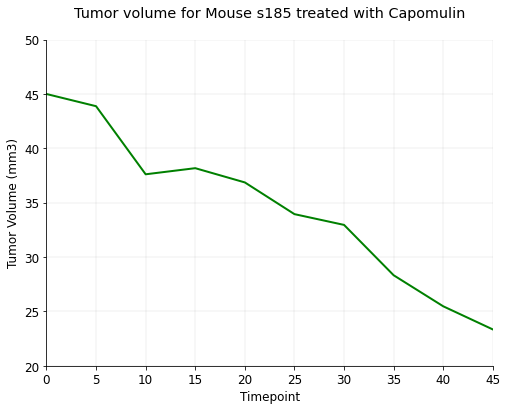

In [19]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Selecting a mouse that was treated with Capomulin
Mouse_ID = 's185'

# Creating a Data Frame of Timepoint and Tumor Volume for a mouse treated with Capomulin
capomulin_time_volume = clean_data.loc[(clean_data['Drug Regimen'] == 'Capomulin') & (clean_data['Mouse ID'] == Mouse_ID),
                                       ['Timepoint', 'Tumor Volume (mm3)']
                                      ].reset_index(drop=True) \
                                       .set_index('Timepoint')

# Creating a line plot from the Data Frame
ax = capomulin_time_volume.plot(figsize=(8, 6),
                                title="Tumor volume for Mouse " + Mouse_ID + " treated with Capomulin\n",
                                linewidth=2,
                                color='green',
                                legend=False)

# Adding ylabel and axis limits to the plot 
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_xlim(0, 45)
ax.set_ylim(20, 50)

# Adding grid lines to the chart
ax.grid(alpha=0.5, color='grey', linewidth=0.25)

# Removing the top and right spines
ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False)

# Print our chart to the screen
plt.show()

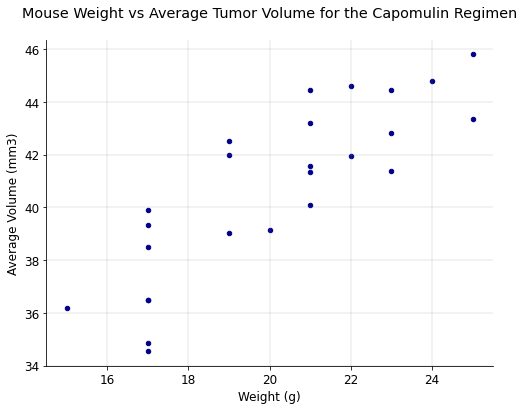

In [20]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Creating a Data Frame with Capomulin regimen alone
capomulin_data = clean_data.loc[(clean_data['Drug Regimen'] == 'Capomulin')]

# Calculating Average Tumor Volume by Grouping by the Mouse ID and Weight
capomulin_weight_volume = pd.DataFrame(capomulin_data.groupby(['Mouse ID','Weight (g)'])['Tumor Volume (mm3)'].mean()).reset_index()

# Renaming column Tumor Volume (mm3) to Average Tumor Volume (mm3)
capomulin_weight_volume = capomulin_weight_volume.rename(columns={"Tumor Volume (mm3)": "Average Volume (mm3)"})

# Setting column Mouse ID as index
capomulin_weight_volume.set_index('Mouse ID')

# Creating a line plot from the Data Frame
ax = capomulin_weight_volume.plot(kind="scatter",
                             x="Weight (g)",
                             y="Average Volume (mm3)",
                             title="Mouse Weight vs Average Tumor Volume for the Capomulin Regimen\n",
                             figsize=(8,6),
                             color='darkblue')

# Removing the top and right spines
ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False)

# Adding grid lines to the chart
ax.grid(color='grey', linewidth=0.25, alpha=0.8)

# Print our chart to the screen
plt.show()

## Correlation and Regression


The correlation between both factors is 0.84
The r-squared is: 0.7089



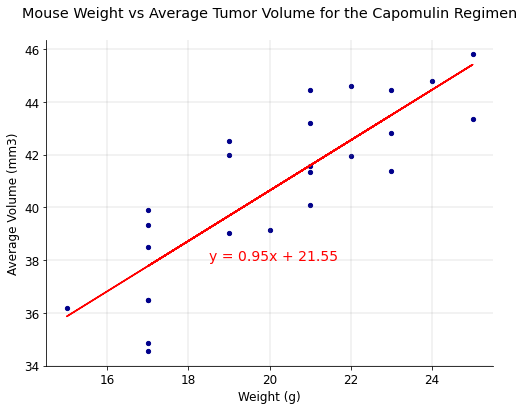

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Setting Weight and Average Volume into x and y value lists
x_values = capomulin_weight_volume['Weight (g)']
y_values = capomulin_weight_volume['Average Volume (mm3)']

# Calculating and Printing Pearson correlation coefficient 
correlation = st.pearsonr(x_values, y_values)
print(f"\nThe correlation between both factors is {round(correlation[0],2)}")


# Print out the r-squared value along with the plot.

# Setting the figure size
fig = plt.figure(figsize=(8,6))

# Creating subplot (1x1 grid, 1st subplot)
ax = fig.add_subplot(1,1,1)

# Adding grid lines to the chart
ax.grid(alpha=0.8, color='grey', linewidth=0.25)

# Removing the top and right spines
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

# Finding slope and y intercept of line, r value, p value and standard error using scipy.stats.linregress function
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Print the r square value
print(f"The r-squared is: {round(rvalue**2, 4)}\n")

# Line equation y=mx+b
regress_values = slope * x_values + intercept

# Line equation string y=mx+b to diplay
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Creating a scatter plot of Weight and Average Tumor volume
plt.scatter(x_values, y_values, color='darkblue', s=18)

# Creating a line plot
plt.plot(x_values, regress_values, "r-")

# Adding line_eq string at specified position
plt.annotate(line_eq,(18.5,38),fontsize=14,color="red")

# Adding title and labels to the plot 
plt.title("Mouse Weight vs Average Tumor Volume for the Capomulin Regimen\n")
plt.xlabel('Weight (g)')
plt.ylabel('Average Volume (mm3)')

# Print our chart to the screen
plt.show()